In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 78.3 MB/s eta 0:00:00


In [ ]:
import fitz

doc = fitz.open("./orwellanimalfarm.pdf")
text = ""
for page in doc:
    text += page.get_text()

In [ ]:
# check
print(f"head: {text[0:500]}")
print("\n")
length = len(text)
print(f"length: {length}")
print("\n")
print(f"last few char: {text[length-3000:length]}")

head: ANIMAL FARM
by George Orwell
 
I
MR. JONES, of the Manor Farm, had locked the hen-houses for the
night, but was too drunk to remember to shut the popholes. With the
ring of light from his lantern dancing from side to side, he lurched
across the yard, kicked off his boots at the back door, drew himself a
last glass of beer from the barrel in the scullery, and made his way up to
bed, where Mrs. Jones was already snoring.
As soon as the light in the bedroom went out there was a stirring and a
flutt


length: 175625


last few char: ession, were owned by the pigs
jointly.
He did not believe, he said, that any of the old suspicions still lingered,
but certain changes had been made recently in the routine of the farm
which should have the effect of promoting confidence stiff further.
Hitherto the animals on the farm had had a rather foolish custom of
addressing one another as "Comrade." This was to be suppressed. There
had also been a very strange custom, whose origin was unknown, of
m

In [ ]:
# remove 'Animal Farm by George Orwell' substring and 'http://www.mudmap.com ... AM]' to clean up text
import re

substr1 = 'http://www.mudmap.com.*?AM]'
cleaned_text1 = re.sub(substr1, "", text)

# check
print(f"head: {cleaned_text1[0:500]}")
print("\n")
length = len(cleaned_text1)
print(f"length: {length}")
print("\n")
print(f"last few char: {cleaned_text1[length-500:length]}")

substr2 = 'Animal Farm by George Orwell'
cleaned_text2 = re.sub(substr2, "", cleaned_text1)

# check
print(f"head: {cleaned_text2[0:500]}")
print("\n")
length = len(cleaned_text2)
print(f"length: {length}")
print("\n")
print(f"last few char: {cleaned_text2[length-500:length]}")

cleaned_text = cleaned_text2

head: ANIMAL FARM
by George Orwell
 
I
MR. JONES, of the Manor Farm, had locked the hen-houses for the
night, but was too drunk to remember to shut the popholes. With the
ring of light from his lantern dancing from side to side, he lurched
across the yard, kicked off his boots at the back door, drew himself a
last glass of beer from the barrel in the scullery, and made his way up to
bed, where Mrs. Jones was already snoring.
As soon as the light in the bedroom went out there was a stirring and a
flutt


length: 170238


last few char:  sharp suspicious
glances, furious denials. The source of the trouble appeared to be that
Napoleon and Mr. Pilkington had each played an ace of spades
simultaneously.
Twelve voices were shouting in anger, and they were all alike. No
question, now, what had happened to the faces of the pigs. The
creatures outside looked from pig to man, and from man to pig, and
from pig to man again; but already it was impossible to say which was
which.
 
George Orwell, Lo

In [ ]:
pip install spacy

In [ ]:
import spacy

In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# split into sentences
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text) #doc object knows where sentences start and end in cleaned_text

sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip() != ""] # this creates a list with each sentence as an element

print("Sample sentences:")
for s in sentences[:5]:
    print("-", s)

Sample sentences:
- ANIMAL FARM
by George Orwell
 
I
MR. JONES, of the Manor Farm, had locked the hen-houses for the
night, but was too drunk to remember to shut the popholes.
- With the
ring of light from his lantern dancing from side to side, he lurched
across the yard, kicked off his boots at the back door, drew himself a
last glass of beer from the barrel in the scullery, and made his way up to
bed, where Mrs. Jones was already snoring.
- As soon as the light in the bedroom went out there was a stirring and a
fluttering all through the farm buildings.
- Word had gone round during
the day that old Major, the prize Middle White boar, had had a strange
dream on the previous night and wished to communicate it to the other
animals.
- It had been agreed that they should all meet in the big barn as
soon as Mr. Jones was safely out of the way.


In [ ]:
lengths = [len(s) for s in sentences]
print(lengths)

[155, 266, 114, 176, 108, 234, 146, 194, 109, 144, 162, 195, 120, 111, 214, 71, 67, 213, 53, 59, 202, 213, 128, 138, 131, 240, 105, 204, 35, 35, 162, 191, 45, 56, 62, 274, 86, 29, 69, 48, 106, 34, 161, 177, 52, 88, 51, 37, 35, 91, 58, 123, 34, 133, 116, 106, 84, 58, 117, 73, 116, 65, 132, 82, 60, 62, 34, 49, 121, 66, 49, 174, 124, 122, 68, 47, 21, 76, 47, 191, 78, 151, 59, 33, 144, 15, 55, 85, 20, 25, 47, 129, 124, 37, 59, 81, 26, 58, 100, 121, 44, 82, 40, 56, 81, 57, 144, 31, 64, 54, 42, 22, 65, 36, 64, 58, 154, 81, 52, 164, 40, 108, 31, 49, 139, 140, 129, 131, 129, 132, 135, 131, 71, 82, 192, 110, 106, 174, 111, 121, 89, 40, 119, 61, 47, 24, 62, 102, 212, 145, 117, 160, 146, 49, 139, 171, 64, 125, 145, 57, 154, 44, 292, 68, 124, 47, 31, 45, 74, 93, 63, 54, 95, 102, 129, 89, 148, 195, 73, 229, 155, 104, 115, 118, 177, 151, 51, 154, 120, 176, 38, 125, 40, 116, 49, 117, 83, 45, 201, 92, 141, 165, 66, 115, 155, 81, 252, 215, 127, 18, 78, 128, 90, 28, 156, 92, 130, 158, 140, 90, 84, 61, 1

In [ ]:
mean_length = sum(lengths) / len(lengths)
print(f"Mean sentence length: {mean_length:.2f}")

Mean sentence length: 103.94


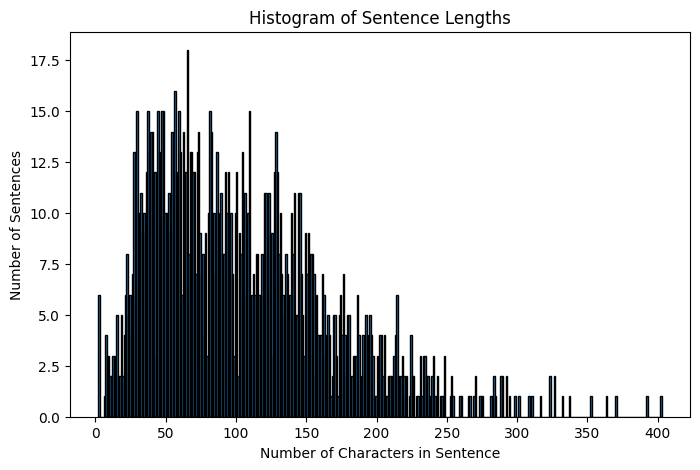

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(lengths, bins=range(min(lengths), max(lengths)+2), edgecolor='black')

plt.xlabel("Number of Characters in Sentence")
plt.ylabel("Number of Sentences")
plt.title("Histogram of Sentence Lengths")
plt.show()

In [ ]:
print(len(sentences))

1603


In [ ]:
pip install langchain openai nltk numpy

In [ ]:
# fixed-size chunking with overlap
from langchain.text_splitter import CharacterTextSplitter
fixed_overlap_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=200,
    chunk_overlap=50
)
fixed_overlap_chunks = fixed_overlap_splitter.split_text(cleaned_text)
print("\nFixed-size Chunks with Overlap:\n", fixed_overlap_chunks[0])
print("\nFixed-size Chunks with Overlap:\n", fixed_overlap_chunks[1])
print("\nFixed-size Chunks with Overlap:\n", fixed_overlap_chunks[2])


Fixed-size Chunks with Overlap:
 ANIMAL FARM
by George Orwell
 
I
MR. JONES, of the Manor Farm, had locked the hen-houses for the
night, but was too drunk to remember to shut the popholes. With the
ring of light from his lantern

Fixed-size Chunks with Overlap:
 popholes. With the
ring of light from his lantern dancing from side to side, he lurched
across the yard, kicked off his boots at the back door, drew himself a
last glass of beer from the barrel in the

Fixed-size Chunks with Overlap:
 a
last glass of beer from the barrel in the scullery, and made his way up to
bed, where Mrs. Jones was already snoring.
As soon as the light in the bedroom went out there was a stirring and


In [ ]:
import json

with open("book_chunks.json", "w") as f:
    json.dump(fixed_overlap_chunks, f)

In [ ]:
pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("BAAI/bge-base-en")

book_embeddings = embedder.encode(fixed_overlap_chunks, convert_to_tensor=True)

print(book_embeddings.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

torch.Size([1123, 768])


In [ ]:
# save embeddings
import numpy as np

embeddings_numpy = book_embeddings.cpu().numpy()

np.save("book_embeddings.npy", embeddings_numpy)